In [100]:
import numpy as np
import pandas as pd
from io import StringIO 
import graphviz 
import pydotplus
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [101]:
dataset = pd.read_csv('./Datasets/air_satisfaction.csv')
dataset.head()

,Num,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [102]:
# удаляем ненужные строки
dataset.drop(['Num','id'], axis=1, inplace=True)
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [103]:
# ищем пропуски
dataset.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [104]:
# удаляем строки с пропусками
dataset.dropna(subset='Arrival Delay in Minutes', axis=0, inplace=True)

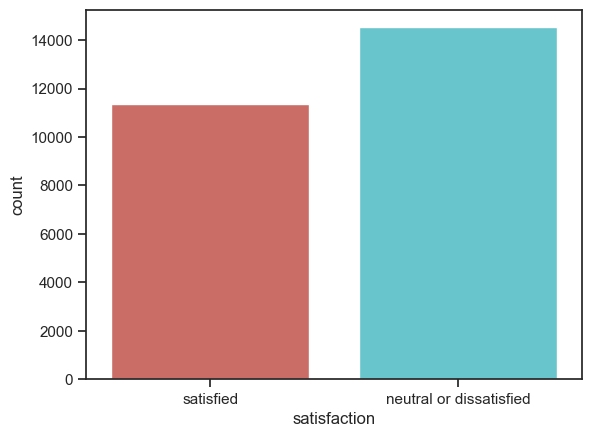

In [105]:
sns.countplot(x='satisfaction', data=dataset, palette='hls')
plt.show()

In [106]:
le = LabelEncoder()
dataset['satisfaction']= le.fit_transform(dataset['satisfaction'])
dataset['Gender']= le.fit_transform(dataset['Gender'])
dataset['Customer Type']= le.fit_transform(dataset['Customer Type'])
dataset['Type of Travel']= le.fit_transform(dataset['Type of Travel'])
dataset['Class']= le.fit_transform(dataset['Class'])

In [107]:
# разделение на объекты-признаки и целевой признак
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [108]:
# кодируем категориальные данные из строк в числа
# le = LabelEncoder()
# y = le.fit_transform(y)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,3,4])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [109]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [110]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test_logreg = logreg.predict(X_test)
y_pred_train_logreg = logreg.predict(X_train)
ac1 = accuracy_score(y_train, y_pred_train_logreg), accuracy_score(y_test, y_pred_test_logreg)
ac1

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8159698754465579, 0.8221664413979533)

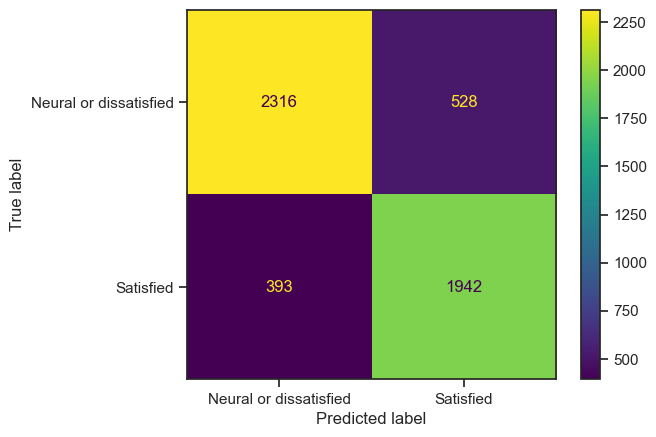

In [111]:
cm1 = confusion_matrix(y_test, y_pred_test_logreg, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied'])
disp.plot()

In [13]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [51]:
# draw_roc_curve(y_test, y_pred_test_logreg, pos_label=1, average='micro')

In [21]:
# svc = SVC(kernel='rbf') (0.6655884908757362, 0.6543734311643175)
# svc = SVC(kernel='sigmoid') (0.42903350391039874, 0.42479243097123)
svc = SVC(kernel='poly') # (0.6698368253355219, 0.6597798802857695)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
ac2 = accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)
ac2

SVC(degree=2, kernel='poly')

In [29]:
param_grid = {'degree': [1,2,3,4,5], 'kernel':['poly']}
grid = GridSearchCV(SVC(), param_grid, verbose=2, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................degree=1, kernel=poly; total time=  20.0s
[CV] END ..............................degree=1, kernel=poly; total time=  18.7s
[CV] END ..............................degree=1, kernel=poly; total time=  19.1s
[CV] END ..............................degree=1, kernel=poly; total time=  19.8s
[CV] END ..............................degree=1, kernel=poly; total time=  19.5s
[CV] END ..............................degree=2, kernel=poly; total time=  22.6s
[CV] END ..............................degree=2, kernel=poly; total time=  23.2s
[CV] END ..............................degree=2, kernel=poly; total time=  24.6s
[CV] END ..............................degree=2, kernel=poly; total time=  19.7s
[CV] END ..............................degree=2, kernel=poly; total time=  21.5s
[CV] END ..............................degree=3, kernel=poly; total time=  23.1s
[CV] END ..............................degree=3, 

{'degree': 5, 'kernel': 'poly'}

In [41]:
# plt.plot([1,2,3,4,5], grid.cv_results_['mean_test_score'])

In [112]:
svc = SVC(kernel='poly', degree=5)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)

(0.682678381770783, 0.6736821780266461)

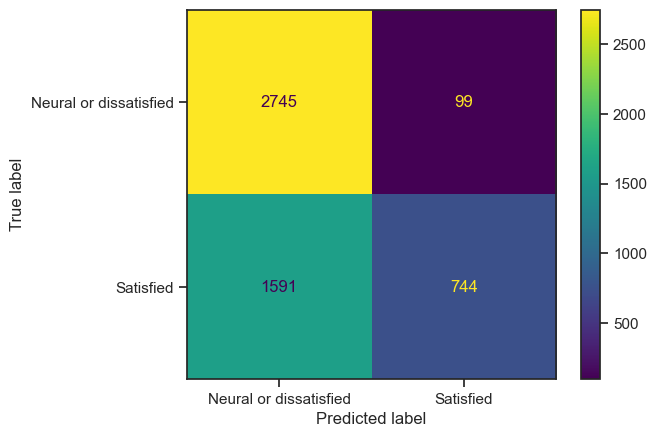

In [113]:
cm2 = confusion_matrix(y_test, y_pred_test_svc, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Neural or dissatisfied', 'Satisfied'])
disp.plot()

In [114]:
tree = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)
ac3 = accuracy_score(y_train, y_pred_train_tree), accuracy_score(y_test, y_pred_test_tree)
ac3

(1.0, 0.9376327476346785)

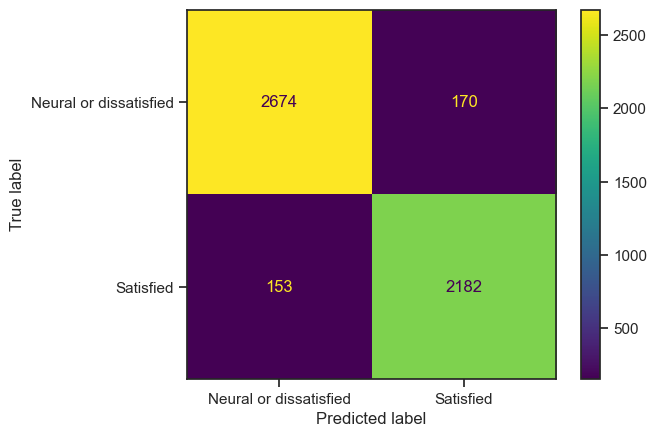

In [115]:
cm3 = confusion_matrix(y_test, y_pred_test_tree, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Neural or dissatisfied', 'Satisfied'])
disp.plot()

In [116]:
# сравнение качества моделей по 2 метрикам
print('LogisticRegression:     ', ac1)
print('SVC:                    ', ac2)
print('DecisionTreeClassifier: ', ac3)

LogisticRegression:      (0.8159698754465579, 0.8221664413979533)
SVC:                     (0.6827266582987351, 0.6734890905580228)
DecisionTreeClassifier:  (1.0, 0.9376327476346785)


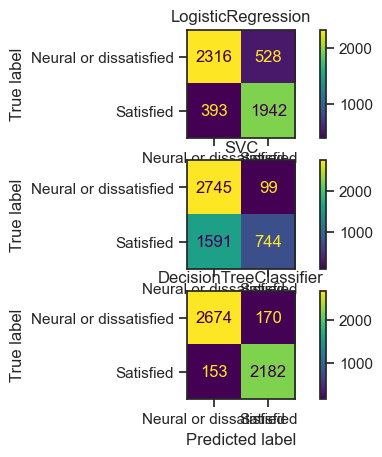

In [117]:
fig, ax = plt.subplots(3,1)
ax[0].set_title("LogisticRegression")
ax[1].set_title("SVC")
ax[2].set_title("DecisionTreeClassifier")

ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[1])

ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Neural or dissatisfied', 'Satisfied']).plot(ax=ax[2])

In [118]:
tree_rules = export_text(tree, feature_names=list(dataset.iloc[:, :-1].columns))
HTML('<pre>' + tree_rules + '</pre>')

In [124]:
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=dataset.iloc[:, :-1].columns, 
                           class_names=['Neural or dissatisfied', 'Satisfied'], 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [122]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

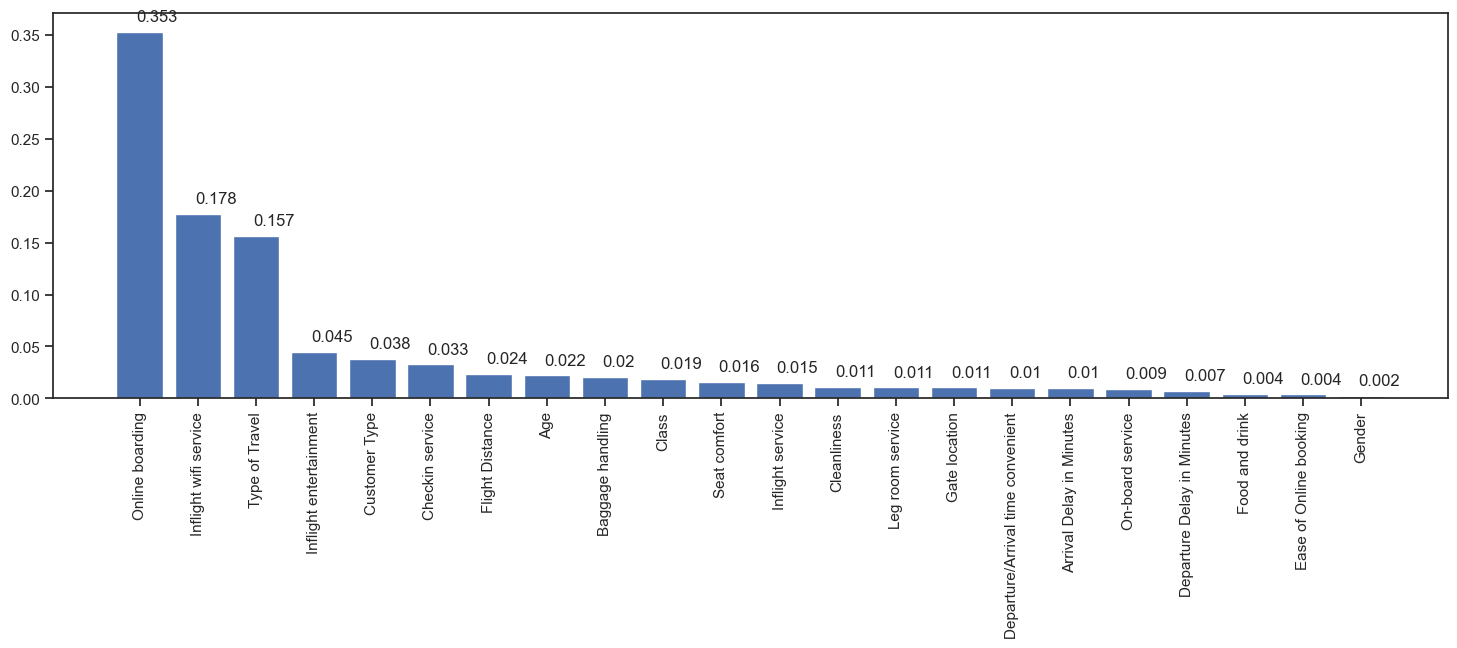

In [123]:
fl, fd = draw_feature_importances(tree, dataset.iloc[:, :-1])

<AxesSubplot: xlabel='Class', ylabel='count'>

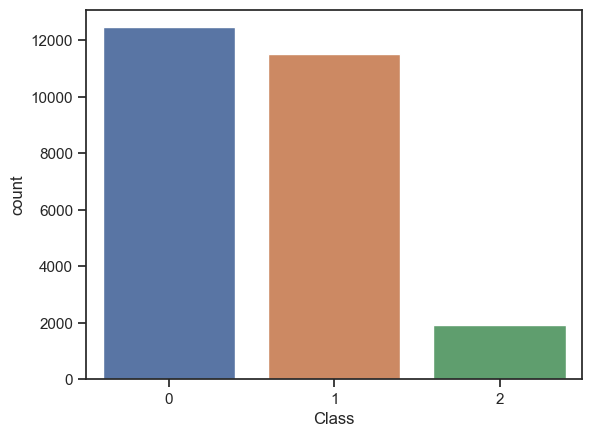

In [125]:
sns.countplot(x=dataset['Class'])